# meaning
Early stopping is a regularization technique used in training machine learning models, especially neural networks, to prevent overfitting. The main idea is to stop training before the model starts to overfit the training data.

In [389]:
import tensorflow
from tensorflow import  keras 
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [390]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

In [391]:
df=pd.DataFrame(X,y,columns=["X","y"])
df.head()

,X,y
1,0.927877,-0.045217
1,-0.543032,-0.754447
0,0.924653,-0.714925
0,-0.102171,-0.892835
0,-1.017192,0.247378


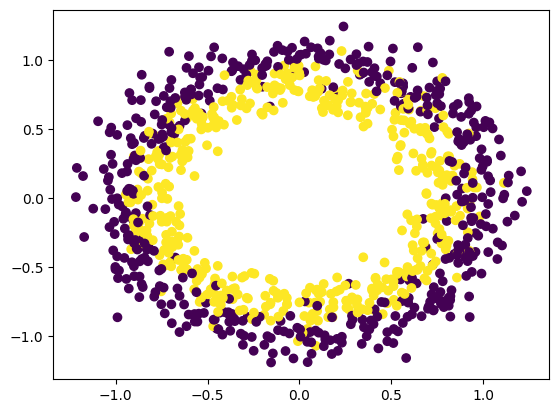

In [392]:
plt.scatter(df["X"],df["y"],c=y)

<Axes: xlabel='X', ylabel='y'>

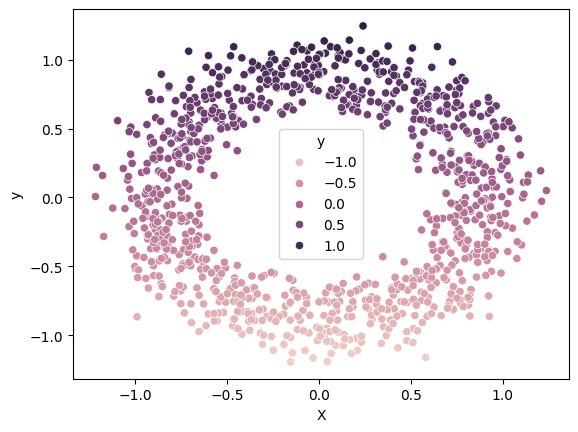

In [393]:
sns.scatterplot(x=df["X"],y=df["y"], hue=df["y"])

In [394]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [395]:
np.shape(X)

(1000, 2)

In [396]:
model = Sequential()

model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(8,activation="relu"))
model.add(Dense(1, activation='sigmoid'))

/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [397]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [398]:
model.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_116 (Dense)               │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [399]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, verbose=0)

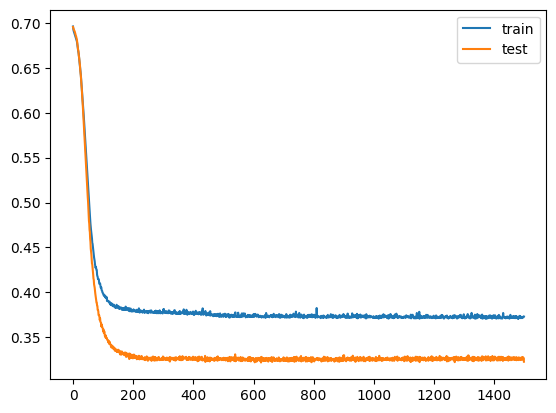

In [400]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 1s 154us/step


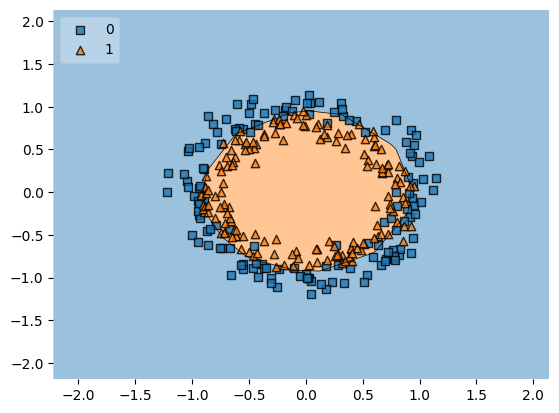

In [401]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

Early Stopping

In [402]:
model = Sequential()

model = Sequential()

model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(8,activation="relu"))
model.add(Dense(1, activation='sigmoid'))

In [403]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [404]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [405]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4914 - loss: 0.7325 - val_accuracy: 0.5033 - val_loss: 0.7251
Epoch 2/3500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4900 - loss: 0.7148 - val_accuracy: 0.4767 - val_loss: 0.7134
Epoch 3/3500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4871 - loss: 0.7055 - val_accuracy: 0.4667 - val_loss: 0.7079
Epoch 4/3500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4843 - loss: 0.7010 - val_accuracy: 0.4433 - val_loss: 0.7049
Epoch 5/3500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4543 - loss: 0.6987 - val_accuracy: 0.4367 - val_loss: 0.7028
Epoch 6/3500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4557 - loss: 0.6970 - val_accuracy: 0.3800 - val_loss: 0.7012
Epoch 7/3500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4114 - loss: 0.6958 - val_accuracy: 0.3567 - val_loss: 0.6997
Epoch 8/3500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4257 - loss: 0.6945 - val_accuracy: 0.4033 - val_lo

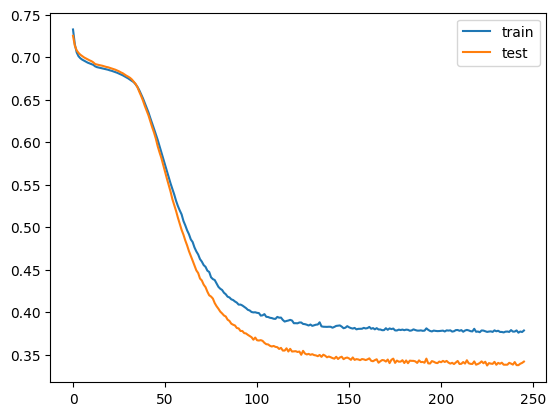

In [406]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 156us/step


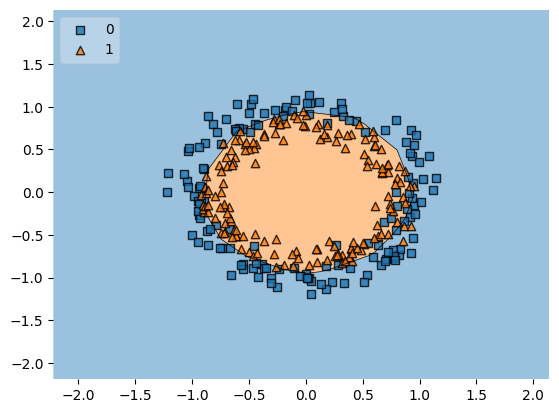

In [407]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

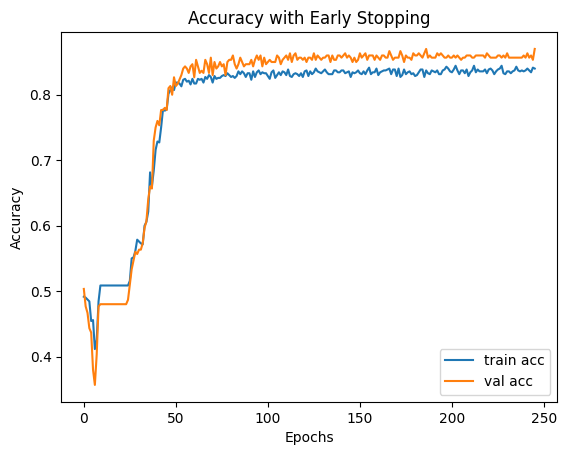

In [408]:
plt.plot(history.history['accuracy'], label="train acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy with Early Stopping")
plt.legend()
plt.show()